# Desafio Cientista de Dados - Lighthouse

## Setup inicial - importação de bibliotecas

In [ ]:
import pandas            as pd
import numpy             as np
import statsmodels.api   as sm
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Carregamento do dataset
df_rent = pd.read_csv('/content/teste_indicium_precificacao.csv')

## Análise Exploratória do Dataset - Parte 1

In [ ]:
# Exibição do df
df_rent.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
# Dimensões do df
df_rent.shape

(48894, 16)

In [ ]:
# Informações do df
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

- A princípio, os registros NaN podem estar alterando os valores referentes as colunas 'ultima_review' e 'reviews_por_mes'.
- Provavelmente, se o 'numero_de_reviews' foi igual a *zero*, as duas colunas seguintes serão preenchidas com NaN.

In [ ]:
# Verificando valores nulos
df_rent.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Verificando NaN
df_rent.isna().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


### Tratamento dos valores NaN

In [ ]:
# Df temporário para análise dos valores nulos
df_temp = df_rent.copy()

In [ ]:
# Identificando colunas null ou NaN
colunas_nulas = df_temp.columns[df_temp.isnull().any()].tolist()

In [ ]:
# Df novo
df_com_nulos = df_temp[colunas_nulas]
df_com_nulos.head(20)

,nome,host_name,ultima_review,reviews_por_mes
0,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
1,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
2,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
3,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
4,Large Cozy 1 BR Apartment In Midtown East,Chris,2019-06-22,0.59
5,BlissArtsSpace!,Garon,2017-10-05,0.40
6,Large Furnished Room Near B'way,Shunichi,2019-06-24,3.47
7,Cozy Clean Guest Room - Family Apt,MaryEllen,2017-07-21,0.99
8,Cute & Cozy Lower East Side 1 bdrm,Ben,2019-06-09,1.33
9,Beautiful 1br on Upper West Side,Lena,2019-06-22,0.43


In [ ]:
# Coluna nome e host_name
colunas_nomes = df_com_nulos[df_com_nulos['nome'].isnull() | df_com_nulos['host_name'].isnull()]
colunas_nomes.head(21)

,nome,host_name,ultima_review,reviews_por_mes
359,Bienvenue,NaN,2019-07-08,0.45
2699,Cozy Studio in Flatbush,NaN,2017-01-02,0.69
2853,NaN,Peter,NaN,NaN
3702,NaN,Anna,2015-06-08,0.45
5744,SPRING in the City!! Zen-Style Tranquil Bedroom,NaN,2019-05-23,1.00
5774,NaN,Jesse,2015-01-01,0.02
5974,NaN,Michaël,2016-01-02,0.09
6074,Charming Room in Prospect Heights!,NaN,NaN,NaN
6268,NaN,Lucie,NaN,NaN
6566,NaN,Carolina,NaN,NaN


Para tratamento desses dados, foi tomada a seguinte decisão:
- Os valores das colunas 'ultima_review' e 'reviews_por_mes' serão substituidos por 0. Visto que não houve locação desse imóvel.
- Alguns hosts tiveram avaliações mas estão com as colunas 'nome' ou 'host_nome' vazias. Nesses casos, os vazios serão preenchidos com 'Não informado'.
- Os registros que tiverem 'reviews_por_mes' igual a zero serão dropados para não interferir na análise preditiva.


In [ ]:
# Substituição por zero
df_temp['ultima_review'].fillna(0)
df_temp['reviews_por_mes'].fillna(0)

,reviews_por_mes
0,0.38
1,0.00
2,4.64
3,0.10
4,0.59
...,...
48889,0.00
48890,0.00
48891,0.00
48892,0.00


In [ ]:
# Verificando se ainda há valores nulos
df_temp[['reviews_por_mes','ultima_review']].isnull().sum()

,0
reviews_por_mes,10052
ultima_review,10052


In [ ]:
print(df_temp['nome'].value_counts(dropna=False))  # Contar todas as ocorrências, incluindo NaN

nome
Hillside Hotel                                        18
Home away from home                                   17
NaN                                                   16
New york Multi-unit building                          16
Brooklyn Apartment                                    12
                                                      ..
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Modern Oasis in Central Park Slope                     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47905, dtype: int64


In [ ]:
print(df_temp['host_name'].value_counts(dropna=False))

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 293
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11453, dtype: int64


In [ ]:
# Remover espaços em branco e substituir valores vazios ou NaN por "Não informado"
df_temp['nome'] = df_temp['nome'].replace(['', ' '], 'Não informado').fillna('Não informado')
df_temp['host_name'] = df_temp['host_name'].replace(['', ' '], 'Não informado').fillna('Não informado')

In [ ]:
# Verificar se ainda há valores vazios
print(df_temp[['nome', 'host_name']].isnull().sum())

nome         0
host_name    0
dtype: int64


In [ ]:
# Dropar as linhas que tenham como valor zero
df_temp = df_temp.dropna(subset=['reviews_por_mes'])

In [ ]:
df_temp.isnull().sum()

,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Salvando dataset limpo
df_temp.to_csv('rent_clean.csv', index=False)

In [ ]:
# Importando df limpo
df_rent_limpo = pd.read_csv('/content/rent_clean.csv')

In [ ]:
df_rent_limpo.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


### Análise estatísticas das variáveis

In [ ]:
# Variáveis numéricas
df_rent_limpo.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,3.884200e+04,3.884200e+04,38842.000000,38842.000000,38842.000000,38842.000000,38842.000000,38842.000000,38842.000000,38842.000000
mean,1.809693e+07,6.424080e+07,40.728136,-73.951148,142.317775,5.868184,29.298079,1.373251,5.164435,114.876448
std,1.069344e+07,7.588875e+07,0.054990,0.046695,196.948156,17.384990,48.186884,1.680453,26.296003,129.539087
min,2.595000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720216e+06,7.035141e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887151e+07,2.837249e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755494e+07,1.018652e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Variáveis categoricas
df_rent_limpo.describe(include=['object'])

,nome,host_name,bairro_group,bairro,room_type,ultima_review
count,38842,38842,38842,38842,38842,38842
unique,38269,9887,5,218,3,1764
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,12,335,16632,3163,20332,1413


## Análise Exploratória do Dataset - Parte 2

### Correlações

In [ ]:
# Selecionar colunas numéricas
colunas_numericas = df_rent_limpo.select_dtypes(include=['int64', 'float64'])
# Matriz de correlação
correlacao = colunas_numericas.corr()
correlacao

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,1.000000,0.591519,-0.010078,0.103134,-0.006645,-0.073917,-0.329896,0.291810,0.098487,0.006515
host_id,0.591519,1.000000,0.012915,0.141086,0.006270,-0.051699,-0.141830,0.296406,0.149414,0.155133
latitude,-0.010078,0.012915,1.000000,0.088137,0.031320,0.024798,-0.008763,-0.010168,0.004327,-0.022157
longitude,0.103134,0.141086,0.088137,1.000000,-0.155361,-0.055422,0.054676,0.145941,-0.093324,0.102568
price,-0.006645,0.006270,0.031320,-0.155361,1.000000,0.025506,-0.035938,-0.030608,0.052903,0.078236
minimo_noites,-0.073917,-0.051699,0.024798,-0.055422,0.025506,1.000000,-0.069371,-0.121708,0.073479,0.101705
numero_de_reviews,-0.329896,-0.141830,-0.008763,0.054676,-0.035938,-0.069371,1.000000,0.549865,-0.059784,0.193587
reviews_por_mes,0.291810,0.296406,-0.010168,0.145941,-0.030608,-0.121708,0.549865,1.000000,-0.009421,0.185835
calculado_host_listings_count,0.098487,0.149414,0.004327,-0.093324,0.052903,0.073479,-0.059784,-0.009421,1.000000,0.182918
disponibilidade_365,0.006515,0.155133,-0.022157,0.102568,0.078236,0.101705,0.193587,0.185835,0.182918,1.000000


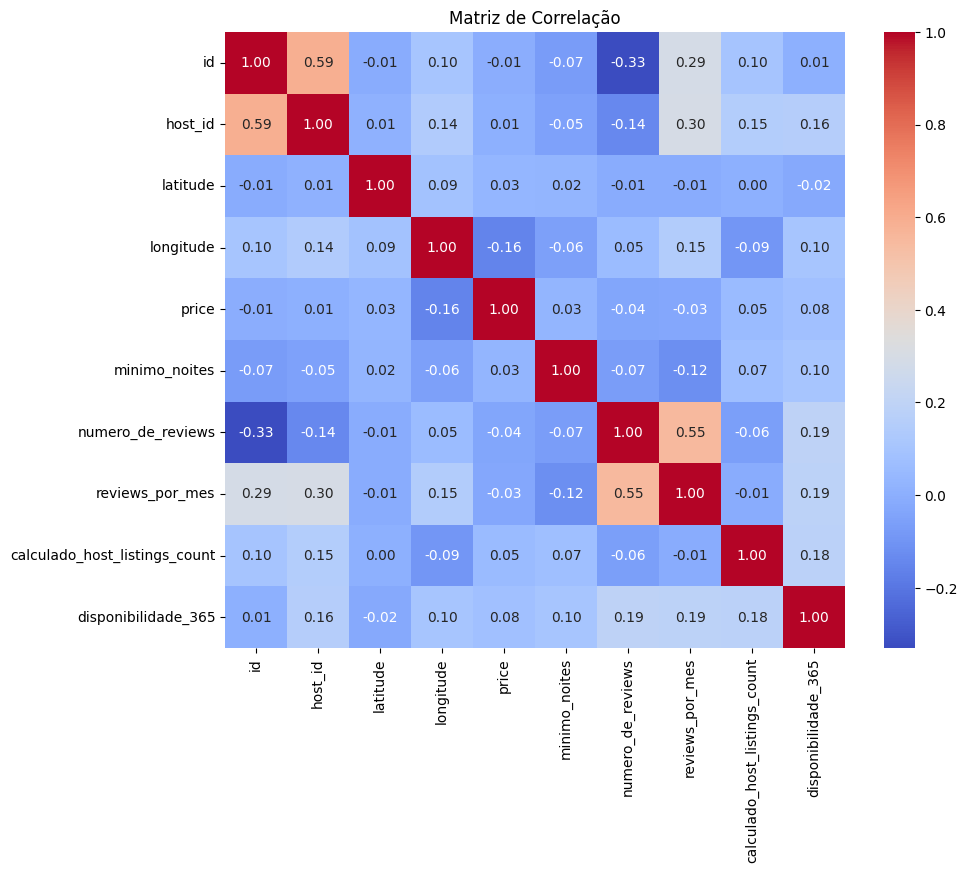

In [ ]:
# Heatmap da correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Com base nesta matriz de correlação, podemos inferir que:

- numero_de_reviews e reviews_por_mes **possuem uma correlação positiva forte**. Quanto mais reviews um imóvel recebe, maior tende a ser o número de reviews por mês, indicando uma atividade maior e potencialmente uma melhor avaliação.
- A localização geográfica não parece ser um forte determinante das outras características dos imóveis.
- A maioria das outras correlações são fracas ou próximas de zero, indicando que não há uma relação linear significativa entre essas variáveis.
- A variável 'preço' não parece ter correlação forte com a maioria das outras variáveis.

## 2.a
Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Agrupar os dados por bairro e calcular métricas.

In [ ]:
df_rent_limpo.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [ ]:
# Agrupando por bairro
analise_bairro = df_rent_limpo.groupby('bairro_group').agg(
    preco_medio = ('price', 'mean'),
    reviews_medio = ('numero_de_reviews', 'mean'),
    disponibilidade_media = ('disponibilidade_365', 'mean'),
    total_moveis = ('id', 'count')
).sort_values(by='preco_medio', ascending=False)
analise_bairro

,preco_medio,reviews_medio,disponibilidade_media,total_moveis
bairro_group,,,,
Manhattan,180.052489,27.330988,109.322932,16632
Brooklyn,121.447039,29.585614,105.863553,16446
Queens,95.762571,34.313511,150.508308,4574
Staten Island,89.964968,36.754777,205.640127,314
Bronx,79.553653,32.386986,170.940639,876


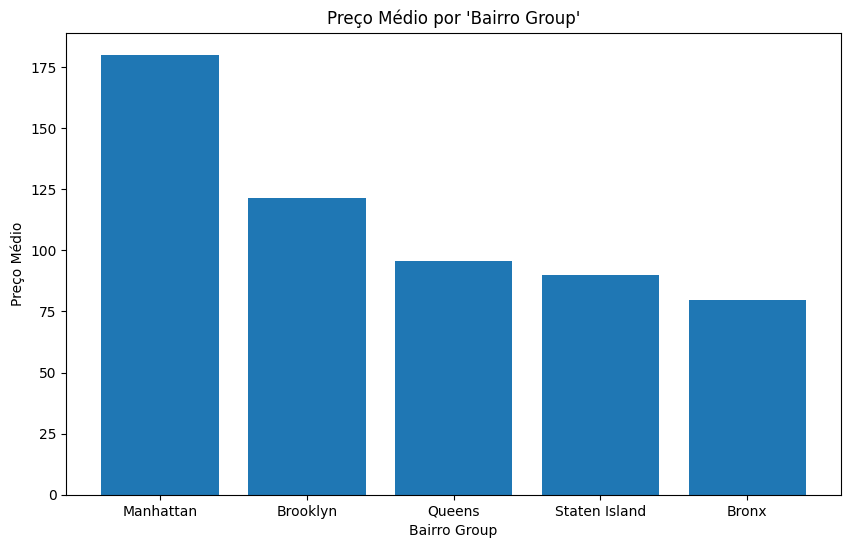

In [ ]:
# Plotagem
plt.figure(figsize=(10,6))
plt.bar(x=analise_bairro.index, height=analise_bairro['preco_medio'])
plt.title("Preço Médio por 'Bairro Group'")
plt.ylabel('Preço Médio')
plt.xlabel('Bairro Group')
plt.show()

**Interpretação**

A melhor escolha para investir depende muito do seu perfil de investidor e dos seus objetivos. Se você busca **alto retorno e valorização**, Manhattan e Brooklyn podem ser boas opções, mas exigem um investimento inicial maior. Se você busca investimentos mais acessíveis e com foco em aluguel, Queens, Staten Island e Bronx podem ser mais interessantes.

## 2.b
O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Verificar gráficos de dispersão para explorar a relação entre 'price' e 'minimo_noites' e 'disponibilidade_365'

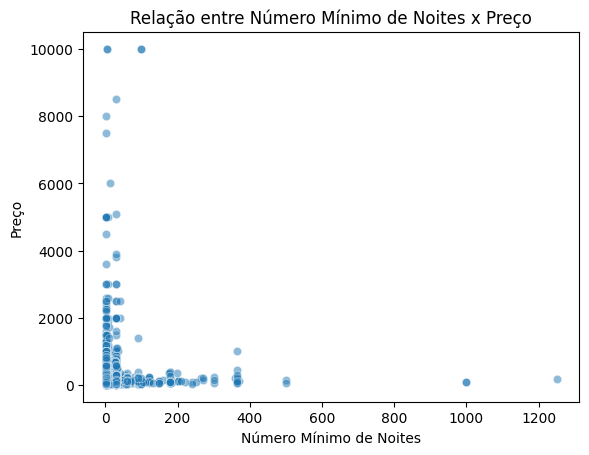

In [ ]:
# Dispersão entre preço x número de noites
sns.scatterplot(data=df_rent_limpo, x='minimo_noites', y='price', alpha=0.5)
plt.title('Relação entre Número Mínimo de Noites x Preço')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

**Interpretação**

Aparentemente, o número mínimo de noites não é um fator determinante para o preço dos imóveis. Há imóveis com poucas noites mínimas que são caros, e há imóveis com muitas noites mínimas que são baratos.

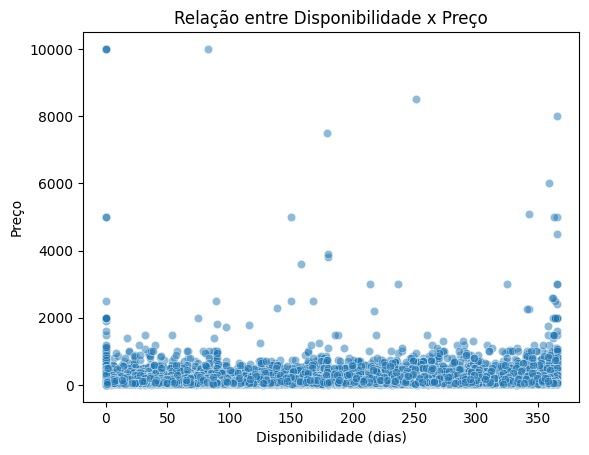

In [ ]:
# Dispersão entre preco x disponibilidade
sns.scatterplot(data=df_rent_limpo, x='disponibilidade_365', y='price', alpha=0.5)
plt.title('Relação entre Disponibilidade x Preço')
plt.xlabel('Disponibilidade (dias)')
plt.ylabel('Preço')
plt.show()

**Interpretação**

Podemos observar que existe uma **correlação negativa fraca** entre a disponibilidade (em dias) e o preço. Isso significa que, em geral, quanto maior a disponibilidade de um imóvel, menor o seu preço.

## 2.c
Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Filtrar os imóveis com valores mais altos (acima do 75° percentil do preço)
Analisar palavras mais frequentes nos nomes dos locais usando processamento de texto (word could, contagem de palavras etc).

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Filtrando os imóveis mais caros
preco_alto = df_rent_limpo[df_rent_limpo['price'] > df_rent_limpo['price'].quantile(0.75)]

In [ ]:
# Concatenar os textos da coluna 'nome'
texto = ' '.join(preco_alto['nome'].dropna().astype(str))

In [ ]:
# Gerar o word cloud
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(texto)

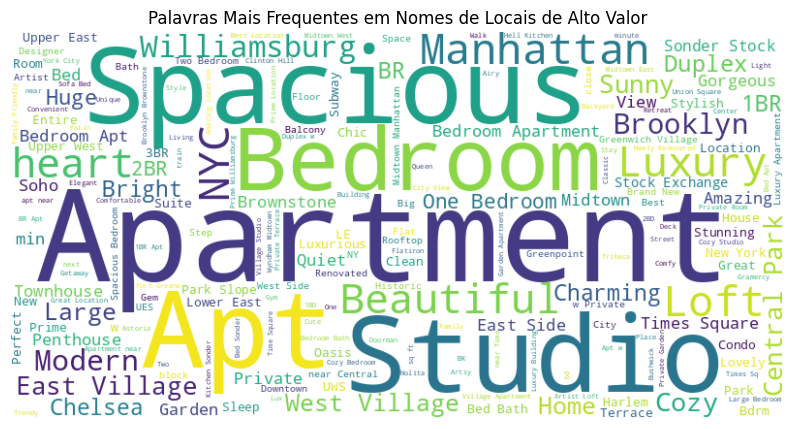

In [ ]:
# Visualizar o word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Mais Frequentes em Nomes de Locais de Alto Valor')
plt.show()

**Intepretação**

* Foco em Apartamentos: A alta frequência da palavra "Apartment" sugere que apartamentos são o tipo de imóvel mais comum entre os de alto valor, provavelmente pela praticidade, segurança e comodidades oferecidas.

* Importância da Localização: A forte presença de nomes de bairros famosos como Manhattan e Brooklyn enfatiza a importância da localização na determinação do valor do imóvel. Bairros nobres, centrais e com boa infraestrutura tendem a ter imóveis mais caros.

* Valorização das Características: Os adjetivos usados para descrever os imóveis (luxuoso, espaçoso, moderno, etc.) mostram que os anúncios destacam os atributos que os diferenciam e justificam o preço mais alto.

* Diversidade de Tipos: Apesar da predominância de apartamentos, a presença de outras palavras como "Loft", "Studio", "Duplex" e "Townhouse" indica que há uma variedade de tipos de imóveis de alto valor para diferentes necessidades e estilos de vida.

## Modelo Preditivo

Prever o preço do aluguel é um problema de **regressão**, pois queremos estimar um valor numérico contínuo.

* Variável alvo (target): price
* Variáveis preditoras (features): Demais colunas que possam influenciar o preço.

In [ ]:
# Criando cópia para fazer o modelo preditivo
df_modelo = df_rent_limpo.copy()

### 1. Tratamento dos dados
O tratamento dos valores nulos/ausentes já foi resolvido anteriormente.

Contudo, para gerar o modelo preditivo, todas as variáveis devem ser do tipo numérico. Então, decidi converter a coluna object "ultima_review":
- Extrair componentes da data (mês e ano) pensando na sazonalidade e seu impacto no preço.

In [ ]:
# Converter a coluna para o formato de data
df_modelo['ultima_review'] = pd.to_datetime(df_modelo['ultima_review'], errors='coerce')

In [ ]:
# Criar colunas de ano e mês da ultima review
df_modelo['ano_ultima_review'] = df_modelo['ultima_review'].dt.year
df_modelo['mes_ultima_review'] = df_modelo['ultima_review'].dt.month

In [ ]:
# Removendo a coluna 'ultima_review'
df_modelo.drop(columns=['ultima_review'], inplace=True)

In [ ]:
# Verificando as colunas do df
df_modelo.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'ano_ultima_review', 'mes_ultima_review'],
      dtype='object')

In [ ]:
df_modelo.dtypes

,0
id,int64
nome,object
host_id,int64
host_name,object
bairro_group,object
bairro,object
latitude,float64
longitude,float64
room_type,object
price,int64


### 2. Seleção das variáveis preditoras (features)

* Numéricas: latitude, longitude, minimo_noites, numero_de_reviews, reviews_por_mes, calculado_host_listings_count, disponibilidade_365, ano_ultima_review, mes_ultima_review

* Categóricas: room_type, bairro_group, bairro


*Variáveis como id, host_id, host_nome e nome não são úteis para a previsão do preço, então serão removidas.*

In [ ]:
# Dropando as colunas não úteis
df_modelo = df_modelo.drop(columns=['id', 'host_id', 'host_name', 'nome'])

In [ ]:
df_modelo.columns

Index(['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'price',
       'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365',
       'ano_ultima_review', 'mes_ultima_review'],
      dtype='object')

### 3. Transformação de Variáveis Categóricas

In [ ]:
# Necessário criar uma nova cópia a partir daqui para conseguir adicionar novos valores
df_copia_modelo = df_modelo.copy()

In [ ]:
# Aplicar One-Hot Encoding nas variáveis categóricas
df_copia_modelo = pd.get_dummies(df_copia_modelo, columns=['room_type', 'bairro_group', 'bairro'], drop_first=True)

### 4. Divisão dos Dados

Agora, dividimos os dados em treino (80%) e teste (20%) para avaliar o modelo

In [ ]:
# Separar variáveis preditoras (X) e alvo (y)
X = df_copia_modelo.drop(columns=['price'])
y = df_copia_modelo['price']

In [ ]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Escolha do Modelo

Apesar da Regressão Linear ser de fácil interpretação, a mesma não lida bem com relações não lineares (como é o caso). Logo, é mais indicado o **Random Forest** pois equilibra desempenho e facilidade de uso.

In [ ]:
# Criar o modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Treinar o modelo
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 6. Avaliação do Modelo

Para medir o desempenho do modelo, usa-se métricas de regressão como:

* Erro Absoluto Médio (MAE): Mostra o erro médio em unidades monetárias.Quanto menor o valor, melhor o modelo

* Erro Quadrático Médio (MSE): Penaliza mais erros grandes (outliers).
* R² (R-quadrado): Mede o quanto o modelo explica a variação dos dados.

In [ ]:
# Importação de biblioteca
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 54.33
MSE: 24547.65
R²: 0.26


A variação do preço é de 54,33 reais. Como o R² foi de 0.26 (muito baixo), provavelmente o modelo precisa de ajustes ou criar outras variáveis targets.

## 4. Sugestão de preço baseado nas características de um apartamento

In [ ]:
df_modelo.columns

Index(['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'price',
       'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365',
       'ano_ultima_review', 'mes_ultima_review'],
      dtype='object')

In [ ]:
from datetime import datetime

# Criar um DataFrame com os dados do apartamento
novo_apartamento = pd.DataFrame([{
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ano_ultima_review': 2019,  # Extraído da data '2019-05-21'
    'mes_ultima_review': 5,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}])

# Adicionar preço médio do bairro
novo_apartamento['preco_medio_bairro'] = df_modelo[df_modelo['bairro'] == 'Midtown']['price'].mean()

# Aplicar as mesmas transformações feitas nos dados de treino
novo_apartamento = pd.get_dummies(novo_apartamento, columns=['room_type', 'bairro_group', 'bairro'], drop_first=True)

# Garantir que as colunas do novo apartamento são as mesmas do modelo treinado
for col in X_train.columns:
    if col not in novo_apartamento.columns:
        novo_apartamento[col] = 0  # Adiciona colunas ausentes com 0

# Reordenar as colunas para bater com o treino
novo_apartamento = novo_apartamento[X_train.columns]


<ipython-input-42-cf34e17c58a7>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  novo_apartamento[col] = 0  # Adiciona colunas ausentes com 0
<ipython-input-42-cf34e17c58a7>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  novo_apartamento[col] = 0  # Adiciona colunas ausentes com 0
<ipython-input-42-cf34e17c58a7>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [ ]:
# Criando e treinando o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
preco_estimado = rf_model.predict(novo_apartamento)
print(f'Preço estimado: ${preco_estimado[0]:.2f}')

Preço estimado: $275.19


## Salvando em formato .pkl.


In [ ]:
# Importar o módulo
import pickle

In [ ]:
# Salvando o modelo em um arquivo .pkl
with open('modelo_preditivo.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [ ]:
# Baixando no computador
from google.colab import files
files.download('modelo_preditivo.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>